In [1]:
import numpy as np
import scipy.signal
import scipy.io.wavfile
import matplotlib.pyplot as plt

%matplotlib inline
plt.rc('figure', figsize=(16, 4))

In [2]:
def convert_wav_to_float(data):
    if data.dtype == np.uint8:
        data = (data - 128) / 128.
    elif data.dtype == np.int16:
        data = data / 32768.
    elif data.dtype == np.int32:
        data = data / 2147483648.
    return data

In [3]:
sampling_frequency, wav_data = scipy.io.wavfile.read('human.wav')

wav_data = convert_wav_to_float(wav_data)

In [68]:
sampling_frequency_b, wav_data_b = scipy.io.wavfile.read('birds.wav')

wav_data_b = convert_wav_to_float(wav_data_b)

In [4]:
n_samples = len(wav_data)
total_duration = n_samples / sampling_frequency
sample_times = np.linspace(0, total_duration, n_samples)

In [70]:
n_samples_b = len(wav_data_b)
total_duration_b = n_samples_b / sampling_frequency_b
sample_times_b = np.linspace(0, total_duration, n_samples_b)

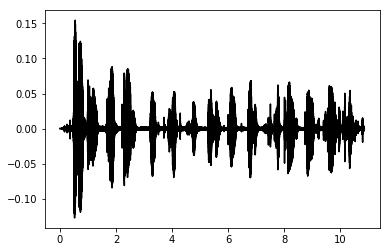

In [5]:
plt.plot(sample_times, wav_data, color='k');

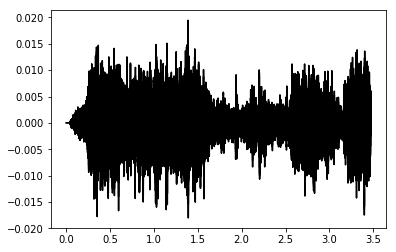

In [43]:
plt.plot(sample_times_b, wav_data_b, color='k');

In [6]:
wav_data.shape

(520832, 2)

In [7]:
def gaussian_spectrogram(x, fs, window_dur=0.0005, step_dur=None, dyn_range=120, 
                         cmap=None, ax=None):
    from scipy.signal import spectrogram, gaussian
    from matplotlib.colors import LogNorm
    from matplotlib.cm import get_cmap
    
    # set default for step_dur, if unspecified. This value is optimal for Gaussian windows.
    if step_dur is None:
        step_dur = window_dur / np.sqrt(np.pi) / 8.
    
    # convert window & step durations from seconds to numbers of samples (which is what
    # scipy.signal.spectrogram takes as input).
    window_nsamp = int(window_dur * fs * 2)
    step_nsamp = int(step_dur * fs)
    print(window_nsamp, step_nsamp, x.shape[-1])
    
    # make the window. A Gaussian filter needs a minimum of 6σ - 1 samples, so working
    # backward from window_nsamp we can calculate σ.
    window_sigma = (window_nsamp + 1) / 6
    window = gaussian(window_nsamp, window_sigma)
    print(window)
    
    # convert step size into number of overlapping samples in adjacent analysis frames
    noverlap = window_nsamp - step_nsamp
    
    # compute the power spectral density
    freqs, times, power = spectrogram(x, detrend=False, mode='psd', fs=fs,
                                      scaling='density', noverlap=noverlap,
                                      window=window, nperseg=None)

    p_ref = 2e-5  # 20 μPa, the standard reference pressure for sound in air

    # set lower bound of colormap (vmin) from dynamic range. The upper bound defaults
    # to the largest value in the spectrogram, so we don't need to set it explicitly.
    dB_max = 10 * np.log10(power.max() / (p_ref ** 2))
    vmin = p_ref * 10 ** ((dB_max - dyn_range) / 10)

    # set default colormap, if none specified
    if cmap is None:
        cmap = get_cmap('Greys')
    # or if cmap is a string, get the actual object
    elif isinstance(cmap, str):
        cmap = get_cmap(cmap)

    # create the figure if needed
    if ax is None:
        fig, ax = plt.subplots()

    # other arguments to the figure
    extent = (times.min(), times.max(), freqs.min(), freqs.max())

    # plot
    ax.imshow(power, origin='lower', aspect='auto', cmap=cmap,
              norm=LogNorm(), extent=extent, vmin=vmin, vmax=None)
    return ax

In [8]:
ax = gaussian_spectrogram(wav_data, sampling_frequency)
ax.set_ylim(0, 12000)
ax.set_xlabel('time (s)')
ax.set_ylabel('frequency (Hz)');

48 1 2
[0.01592046 0.02247631 0.03125953 0.04282804 0.05780458 0.07685722
 0.1006689  0.12989556 0.16511311 0.20675552 0.25504744 0.30993678
 0.37103388 0.43756474 0.50834594 0.58178791 0.65593125 0.72851794
 0.79709572 0.85915    0.91225408 0.9542253  0.9832735  0.99812754
 0.99812754 0.9832735  0.9542253  0.91225408 0.85915    0.79709572
 0.72851794 0.65593125 0.58178791 0.50834594 0.43756474 0.37103388
 0.30993678 0.25504744 0.20675552 0.16511311 0.12989556 0.1006689
 0.07685722 0.05780458 0.04282804 0.03125953 0.02247631 0.01592046]


ValueError: window is longer than input signal

In [48]:
ax = gaussian_spectrogram(wav_data_b, sampling_frequency_b)
ax.set_ylim(0, 12000)
ax.set_xlabel('time (s)')
ax.set_ylabel('frequency (Hz)');

ValueError: window is longer than input signal